# DATA ANALYSIS AND PREDICTION

### Filipe de Macêdo Peixoto / Marcelo Medeiros de Vasconcellos / Antônio de Pádua Dias Costa Júnior

### Descrever o objetivo do trabalho

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

### Carregando o dataset

In [3]:
# Carregando os dados
arquivo = 'sources/houses_to_rent_v2.csv'
dados = read_csv(arquivo)
array = dados.values

# Exibindo o dataframe
dados.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


### Tratamento dos dados

In [4]:
# Excluindo os atributos categóricos
dados = dados.drop(columns = ['city','animal', 'furniture'])

In [5]:
# Renomeando todas as colunas
colunas = ['Área', 'Quartos', 'Banheiro', 'Vagas de Garagem', 'Andar', 'Condomínio', 'Aluguel', 'IPTU', 'Seguro', 'Valor Total']
dados.set_axis(colunas, axis='columns', inplace=True)

In [6]:
# Verificando tipo dos dados
dados.dtypes

Área                 int64
Quartos              int64
Banheiro             int64
Vagas de Garagem     int64
Andar               object
Condomínio           int64
Aluguel              int64
IPTU                 int64
Seguro               int64
Valor Total          int64
dtype: object

In [7]:
# Eliminando linha que contém o caractere "-"
filtro = dados['Andar'] != '-'
dados = dados[filtro]
dados.head(10)

,Área,Quartos,Banheiro,Vagas de Garagem,Andar,Condomínio,Aluguel,IPTU,Seguro,Valor Total
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973
2,80,1,1,1,6,1000,2800,0,41,3841
3,51,2,1,0,2,270,1112,22,17,1421
4,25,1,1,0,1,0,800,25,11,836
6,72,2,1,0,7,740,1900,85,25,2750
7,213,4,4,4,4,2254,3223,1735,41,7253
8,152,2,2,1,3,1000,15000,250,191,16440
9,35,1,1,0,2,590,2300,35,30,2955
10,26,1,1,0,2,470,2100,150,27,2747


In [8]:
# Realizar reset do index
dados = dados.reset_index(drop=True)
dados.head(10)

,Área,Quartos,Banheiro,Vagas de Garagem,Andar,Condomínio,Aluguel,IPTU,Seguro,Valor Total
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973
2,80,1,1,1,6,1000,2800,0,41,3841
3,51,2,1,0,2,270,1112,22,17,1421
4,25,1,1,0,1,0,800,25,11,836
5,72,2,1,0,7,740,1900,85,25,2750
6,213,4,4,4,4,2254,3223,1735,41,7253
7,152,2,2,1,3,1000,15000,250,191,16440
8,35,1,1,0,2,590,2300,35,30,2955
9,26,1,1,0,2,470,2100,150,27,2747


In [9]:
# Ocultar o index
# dados = dados.style.hide_index()

In [10]:
# Transformar "Andar" em valor numérico
dados['Andar'] = pd.to_numeric(dados['Andar'])

In [11]:
# Conferindo os tipos de dados após transformação
dados.dtypes

Área                int64
Quartos             int64
Banheiro            int64
Vagas de Garagem    int64
Andar               int64
Condomínio          int64
Aluguel             int64
IPTU                int64
Seguro              int64
Valor Total         int64
dtype: object

### Análise estatística dos dados

In [12]:
# Verificando a correlação
dados.corr(method = 'pearson')

,Área,Quartos,Banheiro,Vagas de Garagem,Andar,Condomínio,Aluguel,IPTU,Seguro,Valor Total
Área,1.000000,0.143360,0.177147,0.143952,0.029293,0.009582,0.126287,0.026752,0.127733,0.035762
Quartos,0.143360,1.000000,0.724837,0.630170,0.055558,0.020393,0.483813,0.060160,0.487009,0.113443
Banheiro,0.177147,0.724837,1.000000,0.742953,0.157266,0.072874,0.646189,0.094584,0.645273,0.197737
Vagas de Garagem,0.143952,0.630170,0.742953,1.000000,0.177510,0.027586,0.580138,0.090066,0.579047,0.142391
Andar,0.029293,0.055558,0.157266,0.177510,1.000000,0.003632,0.209447,0.021005,0.203213,0.043181
Condomínio,0.009582,0.020393,0.072874,0.027586,0.003632,1.000000,0.050915,0.007914,0.050964,0.964333
Aluguel,0.126287,0.483813,0.646189,0.580138,0.209447,0.050915,1.000000,0.083720,0.995430,0.235151
IPTU,0.026752,0.060160,0.094584,0.090066,0.021005,0.007914,0.083720,1.000000,0.083080,0.210545
Seguro,0.127733,0.487009,0.645273,0.579047,0.203213,0.050964,0.995430,0.083080,1.000000,0.234315
Valor Total,0.035762,0.113443,0.197737,0.142391,0.043181,0.964333,0.235151,0.210545,0.234315,1.000000


In [13]:
# Resumo estatístico do dataframe
dados.describe()

,Área,Quartos,Banheiro,Vagas de Garagem,Andar,Condomínio,Aluguel,IPTU,Seguro,Valor Total
count,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8.231000e+03,8231.000000,8231.000000,8231.000000,8.231000e+03
mean,124.579759,2.342243,2.060503,1.364233,6.583283,1.484767e+03,3582.276394,344.738063,46.455352,5.458473e+03
std,601.034331,1.029864,1.255552,1.237920,6.153925,1.775540e+04,3138.226949,3512.011622,40.152370,1.861053e+04
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,460.000000,0.000000,3.000000,5.070000e+02
25%,54.000000,1.000000,1.000000,1.000000,2.000000,4.150000e+02,1500.000000,36.000000,20.000000,2.079000e+03
50%,80.000000,2.000000,2.000000,1.000000,5.000000,7.500000e+02,2500.000000,112.000000,32.000000,3.456000e+03
75%,141.000000,3.000000,3.000000,2.000000,9.000000,1.512500e+03,4405.000000,332.000000,58.000000,6.394000e+03
max,46335.000000,7.000000,9.000000,8.000000,301.000000,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06


### Visualização gráfica dos dados

In [14]:
# Importando biblioteca para gráficos 
import matplotlib.pyplot as plt
%matplotlib inline

# Define tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (20,13)

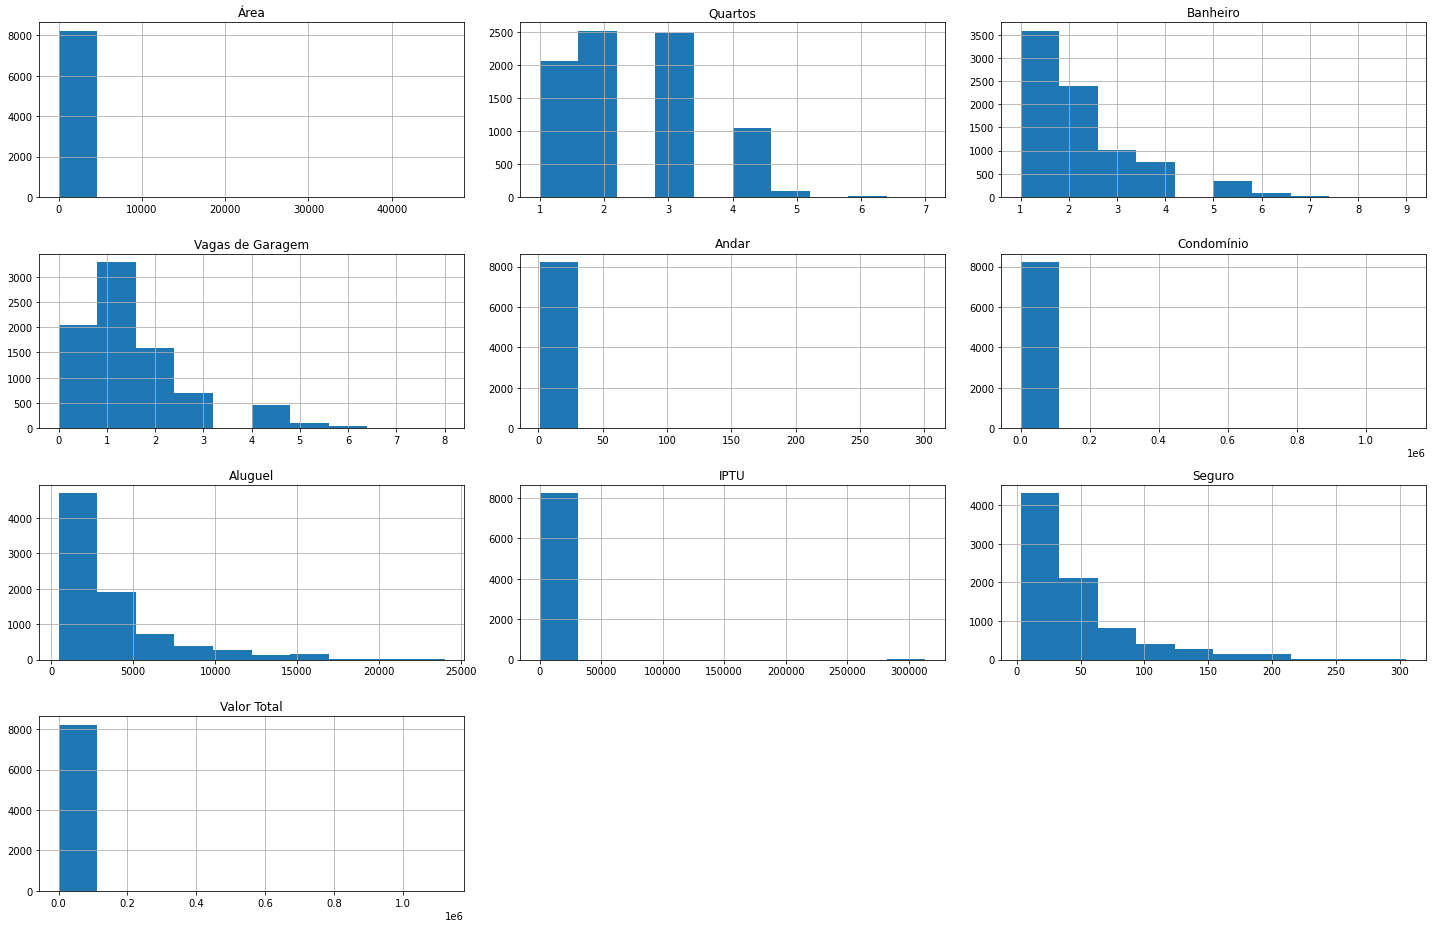

In [15]:
# Histograma
dados.hist()
plt.tight_layout()
plt.show()

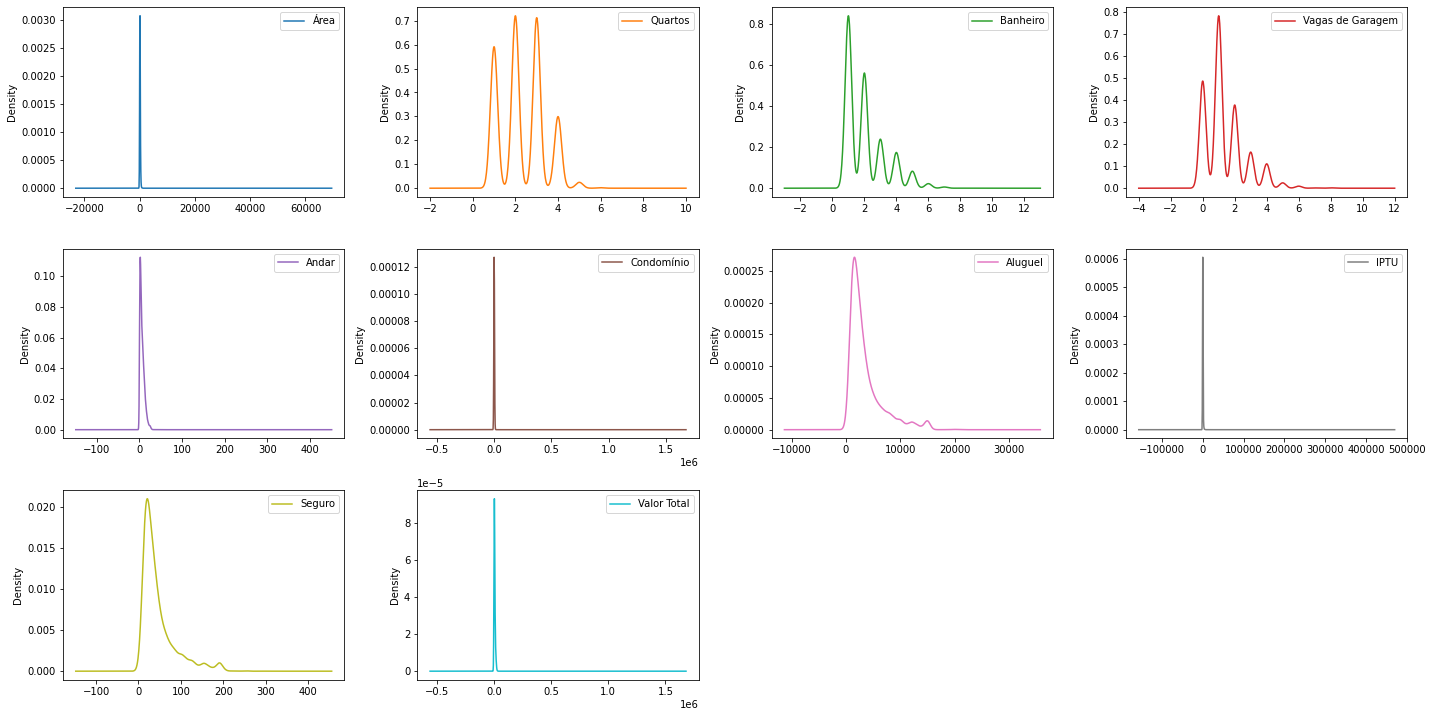

In [16]:
# Density Plot Univariado
dados.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False)
plt.tight_layout()
plt.show()

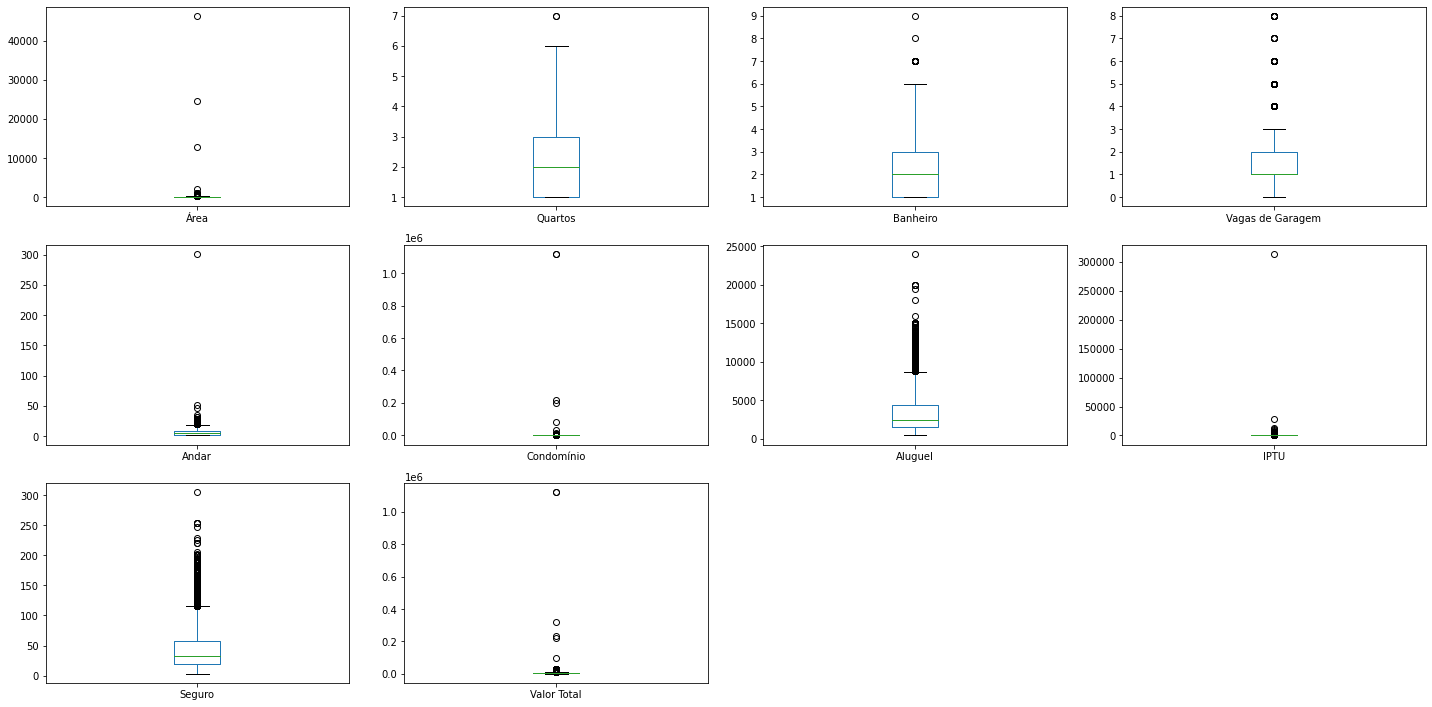

In [17]:
# Box and Whisker Plots
dados.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)
plt.tight_layout()
plt.show()

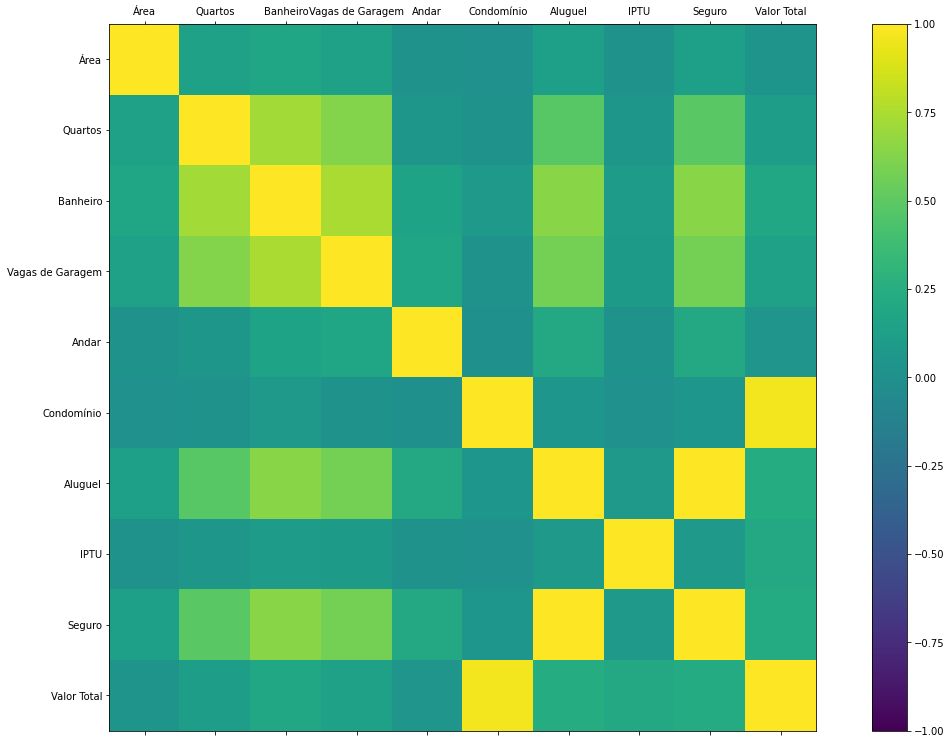

In [18]:
# Matriz de Correlação
correlations = dados.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

### Modelo de Regressão Linear

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Separando o array em componentes de input e output
array = dados.values
X = array[:,0:9]
Y = array[:,9]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

r2 = r2_score(Y_test, Y_pred)
print("O R2 do modelo é:", r2)

#print('coefficient of determination:', modelo.score(X_train, Y_train))
#print('intercept:', modelo.intercept_)
#print('slope:', modelo.coef_)

O MSE do modelo é: 11.222761625941352
O MAE do modelo é: 0.6103319640591237
O R2 do modelo é: 0.9999999773435314


In [20]:
# Dados do imóvel para predição do valor total
# Array com valores de entrada para previsão -> [Área, Quartos, Banheiro, Vagas de Garagem, Andar, Condomínio, Aluguel, IPTU, Seguro]
valores_entrada = np.array([320, 3, 4, 2, 7, 3000, 2500, 1600, 42]).reshape((-1,9))
predicao = modelo.predict(valores_entrada)
print("O valor previsto total é: ",predicao[0])

O valor previsto total é:  7142.64337467441
